In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

Question 1

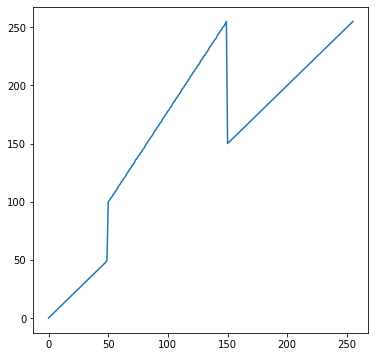

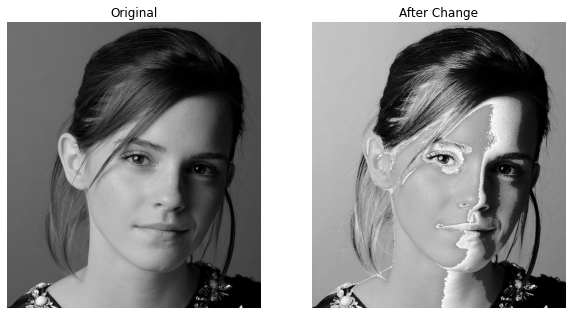

In [13]:
emma = cv.imread(r'images/emma_gray.jpg')
assert emma is not None

t1 = np.linspace(0,50,50)
t2 = np.linspace(100,255,100)
t3 = np.linspace(150,255,106)

table = np.concatenate((t1,t2,t3),axis=0).astype(np.uint8)
fig,ax = plt.subplots(figsize=(6,6))
ax.plot(table)

assert len(table)==256

output_emma = cv.LUT(emma,table)

fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(cv.cvtColor(emma,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].title.set_text('Original')
ax[1].imshow(cv.cvtColor(output_emma,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text('After Change')

Question 2

256 256


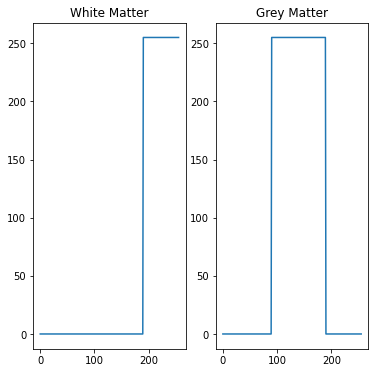

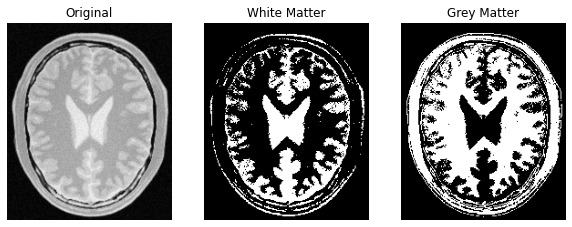

In [10]:
brain_image = cv.imread(r'images/brain_proton_density_slice.png')
assert brain_image is not None

t1_w = [0]*190
t2_w = [255]*66

t1_g = [0]*90
t2_g = [255]*100
t3_g = [0]*66

table_w = np.concatenate((t1_w,t2_w),axis=0).astype(np.uint8)
table_g = np.concatenate((t1_g,t2_g,t3_g),axis=0).astype(np.uint8)

fig,ax = plt.subplots(1,2,figsize=(6,6))
ax[0].plot(table_w)
ax[0].title.set_text('White Matter')
ax[1].plot(table_g)
ax[1].title.set_text('Grey Matter')

print(len(table_g),len(table_w))
assert len(table_w)==256
assert len(table_g)==256

white_brain = cv.LUT(brain_image,table_w)
grey_brain = cv.LUT(brain_image,table_g)

fig,ax = plt.subplots(1,3,figsize=(10,6))
ax[0].imshow(cv.cvtColor(brain_image,cv.COLOR_BGR2RGB))
ax[0].axis('off')
ax[0].title.set_text('Original')
ax[1].imshow(cv.cvtColor(white_brain,cv.COLOR_BGR2RGB))
ax[1].axis('off')
ax[1].title.set_text('White Matter')
ax[2].imshow(cv.cvtColor(grey_brain,cv.COLOR_BGR2RGB))
ax[2].axis('off')
ax[2].title.set_text('Grey Matter')


Question three

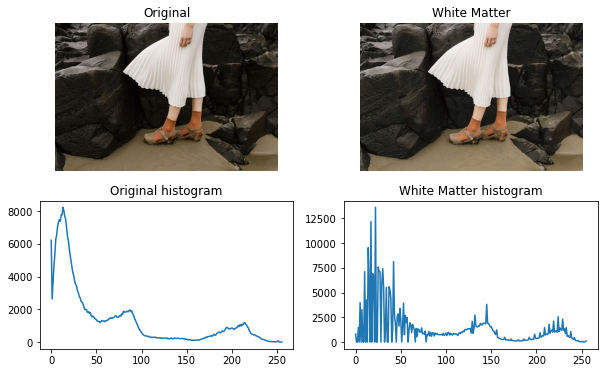

In [53]:
grey_image = cv.imread(r'images/highlights_and_shadows.jpg')
assert grey_image is not None

gamma = 0.8

lab_image = cv.cvtColor(grey_image,cv.COLOR_BGR2LAB)
(l,a,b) = cv.split(lab_image)
table = np.array([(pixel/255)**gamma*255 for pixel in range(0,256)]).astype(np.uint8)
output_l = cv.LUT(l,table)
output_grey = cv.merge([output_l,a,b])

grey_hist = cv.calcHist([grey_image] , [0] , None , [256] , [0 , 256])
output_grey_hist = cv.calcHist([output_grey] , [0] , None , [256] , [0 , 256])
fig,ax = plt.subplots(2,2,figsize=(10,6))
ax[0][0].imshow(cv.cvtColor(grey_image,cv.COLOR_BGR2RGB))
ax[0][0].axis('off')
ax[0][0].title.set_text('Original')
ax[0][1].imshow(cv.cvtColor(output_grey,cv.COLOR_LAB2RGB))
ax[0][1].axis('off')
ax[0][1].title.set_text('White Matter')
ax[1][0].plot(grey_hist)
ax[1][0].title.set_text('Original histogram')
ax[1][1].plot(output_grey_hist)
ax[1][1].title.set_text('White Matter histogram')


Question four

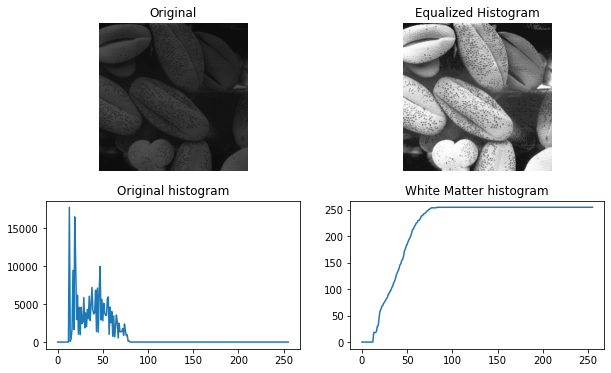

In [5]:
histo_image = cv.imread(r'images/shells.png',cv.IMREAD_GRAYSCALE)
assert histo_image is not None

def histogram_gen(image):
    histo = np.zeros(256)
    for row in image:
        for col in row:
            histo[col]+=1
    return histo

def equalize_histogram(image):
    hstgrm = histogram_gen(image)
    for i in range(1,len(hstgrm)):
        hstgrm[i] += hstgrm[i-1]
    M = len(image)
    N = len(image[0])
    L = 256
    lookuptable =  list(map(int,(L-1)*hstgrm/(M*N)))

    return lookuptable
    
def equalized_image(image):
    copy = image.copy()
    lookuptable = equalize_histogram(image)
    M = len(image)
    N = len(image[0])
    for i in range(M):
        for j in range(N):
            copy[i][j] = lookuptable[image[i][j]]
    return copy


# fig,ax = plt.subplots(1,2,figsize=(10,6))
# ax[0].plot(histo)
# ax[1].plot(eql)

output_histo = equalized_image(histo_image) 

original_histogram = histogram_gen(histo_image)
output_histogram = equalize_histogram(histo_image)

fig,ax = plt.subplots(2,2,figsize=(10,6))
ax[0][0].imshow(cv.cvtColor(histo_image,cv.COLOR_BGR2RGB))
ax[0][0].axis('off')
ax[0][0].title.set_text('Original')
ax[0][1].imshow(cv.cvtColor(output_histo,cv.COLOR_BGR2RGB))
ax[0][1].axis('off')
ax[0][1].title.set_text('Equalized Histogram')
ax[1][0].plot(original_histogram)
ax[1][0].title.set_text('Original histogram')
ax[1][1].plot(output_histogram)
ax[1][1].title.set_text('White Matter histogram')

Qusetion Five

In [19]:
nns = cv.imread(r'images/im01small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
nnz = cv.imread(r'images/im01.png')
bis = cv.imread(r'images/im02small.png',cv.IMREAD_REDUCED_GRAYSCALE_2)

def zoom_nn(image,scale):
    rows = int(scale*image.shape[0])
    cols = int(scale*image.shape[1])
    zoomed = np.zeros((rows,cols),dtype=image.dtype)
    for i in range(rows):
        r_i = round(i/scale)
        if r_i>=image.shape[0]:r_i =image.shape[0] - 1
        for j in range(cols):
            r_j = round(j/scale)
            if r_j>=image.shape[1]:r_j = image.shape[1]-1
            zoomed[i][j] = image[r_i][r_j]
    return zoomed

zoomed_img  = zoom_nn(nns,4)

# fig,ax = plt.subplots(1,3,figsize=(10,6))
# ax[0].imshow(cv.cvtColor(zoomed_img,cv.COLOR_BGR2RGB))
# ax[0].axis('off')
# ax[0].title.set_text('Original')
# ax[1].imshow(cv.cvtColor(nnz,cv.COLOR_BGR2RGB))
# ax[1].axis('off')
# ax[2].imshow(cv.cvtColor(nns,cv.COLOR_BGR2RGB))
# ax[2].axis('off')

cv.namedWindow('Original',cv.WINDOW_AUTOSIZE)
cv.imshow('Original',nns)
cv.waitKey(0)
cv.namedWindow('Zoomed',cv.WINDOW_AUTOSIZE)
cv.imshow('Zoomed',zoomed_img)
cv.waitKey(0)
cv.destroyAllWindows()

Question six

(-0.5, 181.5, 189.5, -0.5)

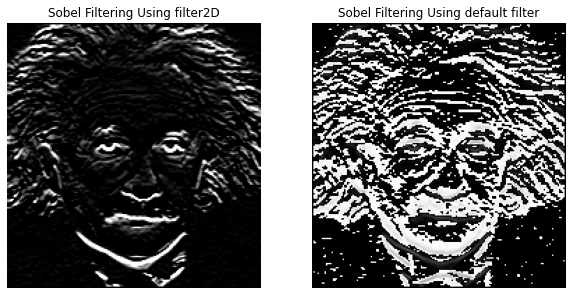

In [8]:
sobel_img = cv.imread(r'images/einstein.png',cv.IMREAD_REDUCED_GRAYSCALE_2)
assert sobel_img is not None
import math

sobel_ver = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype=np.float32)

imgx = cv.filter2D(sobel_img,-1,sobel_ver)

def sobel_filter(img,kernel):
    assert kernel.shape[0]%2 == 1 and kernel.shape[1]%2 == 1
    kernel_height,kernel_width = math.floor(kernel.shape[0]/2),math.floor(kernel.shape[1]/2)
    h,w = len(img),len(img[0])
    img_float = cv.normalize(img.astype('float'),None,0.0,1.0,cv.NORM_MINMAX)
    result = np.zeros(img.shape,'float')

    for hei in range(kernel_height,h-kernel_height):
        for wid in range(kernel_width,w-kernel_width):
            result[hei,wid] = np.dot(img_float[hei-kernel_height:hei+kernel_height+1,wid-kernel_width:wid+kernel_width+1].flatten(),kernel.flatten())
    return result

kernel = np.array([(-1,-2,-1),(0,0,0),(1,2,1)],dtype='float')/10

imgb = sobel_filter(sobel_img,kernel)
imgb = imgb*255.0
imgb = imgb.astype(np.uint8)

fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(cv.cvtColor(imgx,cv.COLOR_BGR2RGB))
ax[0].title.set_text('Sobel Filtering Using filter2D')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(imgb,cv.COLOR_BGR2RGB))
ax[1].title.set_text('Sobel Filtering Using default filter')
ax[1].axis('off')


Question Seven

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

grab_img = cv.imread(r'images/daisy.jpg')
hsv = cv.cvtColor(grab_img,cv.COLOR_BGR2HSV)
flwer = cv.inRange(hsv,(20,0,0),(35,255,255))
ret, thresh = cv.threshold(hsv, 150, 255, cv.THRESH_BINARY)
#contours,heirachy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
# copy_grab = grab_img.copy()
h = len(grab_img)
w = len(grab_img[0])
mask = np.zeros((h,w),np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv.grabCut(grab_img,mask,thresh,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = grab_img*mask2[:,:,np.newaxis]


fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(cv.cvtColor(grab_img,cv.COLOR_BGR2RGB))
ax[0].title.set_text('Sobel Filtering Using filter2D')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(flwer,cv.COLOR_BGR2RGB))
ax[1].title.set_text('Sobel Filtering Using default filter')
ax[1].axis('off')


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

grab_img = cv.imread(r'images/daisy.jpg',cv.IMREAD_REDUCED_GRAYSCALE_2)
hsv = cv.cvtColor(grab_img,cv.COLOR_BGR2HSV)
flwer = cv.inRange(hsv,(20,0,0),(35,255,255))
ret, thresh = cv.threshold(hsv, 150, 255, cv.THRESH_BINARY)
#contours,heirachy = cv.findContours(thresh,cv.RETR_TREE,cv.CHAIN_APPROX_NONE)
# copy_grab = grab_img.copy()
h = len(grab_img)
w = len(grab_img[0])
mask = np.zeros((h,w),np.uint8)
bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (50,50,450,290)
cv.grabCut(grab_img,mask,thresh,bgdModel,fgdModel,5,cv.GC_INIT_WITH_MASK)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = grab_img*mask2[:,:,np.newaxis]


fig,ax = plt.subplots(1,2,figsize=(10,6))
ax[0].imshow(cv.cvtColor(grab_img,cv.COLOR_BGR2RGB))
ax[0].title.set_text('Sobel Filtering Using filter2D')
ax[0].axis('off')

ax[1].imshow(cv.cvtColor(flwer,cv.COLOR_BGR2RGB))
ax[1].title.set_text('Sobel Filtering Using default filter')
ax[1].axis('off')
